In [1]:
import numpy as np
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("C:/Users/정하민/Desktop/인공지능/과제/데이터/"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix


['C-NMC_Leukemia', 'chest_xray', 'test', 'train', 'val']


In [4]:
mainDIR = os.listdir('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [5]:
train_folder= 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/train/'
val_folder = 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/val/'
test_folder = 'C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/test/'

In [6]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1342
normal picture title:  NORMAL2-IM-0539-0001.jpeg
pneumonia picture title: person1345_bacteria_3426.jpeg


Text(0.5, 1.0, 'Pneumonia')

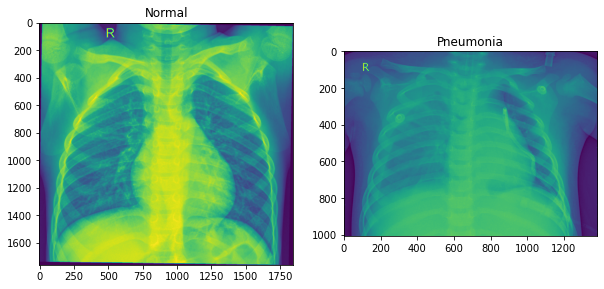

In [7]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [8]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
num_of_test_samples = 600
batch_size = 32

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('C:/Users/정하민/Desktop/인공지능/과제/데이터/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [12]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 20)


Epoch 1/10
163/163 [==============================] - 49s 259ms/step - loss: 0.5167 - accuracy: 0.7520 - val_loss: 0.3739 - val_accuracy: 0.8446
Epoch 2/10
163/163 [==============================] - 36s 219ms/step - loss: 0.2615 - accuracy: 0.8862 - val_loss: 0.5909 - val_accuracy: 0.7596
Epoch 3/10
163/163 [==============================] - 36s 222ms/step - loss: 0.2427 - accuracy: 0.8992 - val_loss: 0.8007 - val_accuracy: 0.7196
Epoch 4/10
163/163 [==============================] - 110s 678ms/step - loss: 0.1958 - accuracy: 0.9222 - val_loss: 0.4498 - val_accuracy: 0.8157
Epoch 5/10
163/163 [==============================] - 103s 630ms/step - loss: 0.1849 - accuracy: 0.9202 - val_loss: 0.4932 - val_accuracy: 0.8269
Epoch 6/10
163/163 [==============================] - 35s 215ms/step - loss: 0.1875 - accuracy: 0.9231 - val_loss: 0.4083 - val_accuracy: 0.8462
Epoch 7/10
163/163 [==============================] - 36s 218ms/step - loss: 0.1704 - accuracy: 0.9306 - val_loss: 0.3052 - val_

In [13]:
test_accu = cnn.evaluate(test_set,steps=20)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 3s 134ms/step - loss: 0.3326 - accuracy: 0.8846
The testing accuracy is : 88.46153616905212 %


In [12]:
hist = cnn.fit_generator(training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data=test_set,
        validation_steps=10)

c:\users\정하민\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 11s 426ms/step - loss: 0.6442 - accuracy: 0.7410 - val_loss: 0.7568 - val_accuracy: 0.5969
Epoch 2/10
10/10 [==============================] - 4s 374ms/step - loss: 0.5062 - accuracy: 0.7781 - val_loss: 0.6158 - val_accuracy: 0.6250
Epoch 3/10
10/10 [==============================] - 4s 372ms/step - loss: 0.4402 - accuracy: 0.7956 - val_loss: 0.4999 - val_accuracy: 0.8344
Epoch 4/10
10/10 [==============================] - 4s 382ms/step - loss: 0.4297 - accuracy: 0.8303 - val_loss: 0.4674 - val_accuracy: 0.7531
Epoch 5/10
10/10 [==============================] - 4s 374ms/step - loss: 0.3316 - accuracy: 0.8571 - val_loss: 0.5785 - val_accuracy: 0.7094
Epoch 6/10
10/10 [==============================] - 4s 379ms/step - loss: 0.5104 - accuracy: 0.7430 - val_loss: 0.4239 - val_accuracy: 0.8156
Epoch 7/10
10/10 [==============================] - 4s 374ms/step - loss: 0.3377 - accuracy: 0.8889 - val_loss: 0.4051 - val_accuracy: 0.8313
Epoch

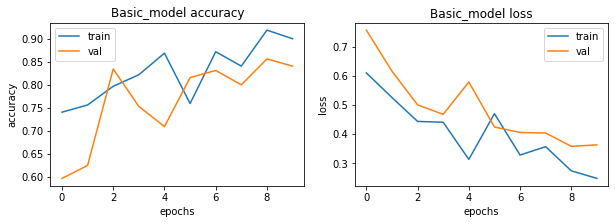

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))


for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Basic_model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])